In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv("../traces/final_data_day_1.csv", dtype={"regions": str})

In [31]:
df.head()

,arrival_timestamp,regions,model_type,workload_type,prompt_size,token_size,client_tenant,request_id,batch_id,scenario,sla,utility,request_type,application_id,batch_size
0,86400.035194,201,D,prod,957,93,4,6034351,-1,ES,10,1,2,-1,1
1,86400.080847,120,A,prod,5887,516,2,1373335,-1,ES,10,1,2,-1,1
2,86400.113242,021,D,prod,7092,89,4,6034350,-1,ES,10,1,2,-1,1
3,86400.339970,201,D,prod,7092,85,6,6034349,-1,ES,10,1,2,-1,1
4,86400.353532,210,D,prod,1997,84,3,6034348,-1,ES,10,1,2,-1,1


In [32]:
df_filtered = df.loc[((df["arrival_timestamp"]-60)//3600 < (df["arrival_timestamp"]//3600)) & (df["arrival_timestamp"] > 86400+3600)]

In [33]:
df_filtered.head()

,arrival_timestamp,regions,model_type,workload_type,prompt_size,token_size,client_tenant,request_id,batch_id,scenario,sla,utility,request_type,application_id,batch_size
65868,90000.022044,102,C,prod,9049,97,5,4858578,-1,ES,10,1,2,-1,1
65869,90000.070335,021,D,prod,165,65,6,5996737,-1,ES,10,1,2,-1,1
65870,90000.235808,201,D,prod,9624,11,13,5996736,-1,ES,10,1,2,-1,1
65871,90000.262991,201,D,prod,11343,463,13,5996735,-1,ES,10,1,2,-1,1
65872,90000.336740,210,C,prod,727,124,5,4858577,-1,ES,10,1,2,-1,1


In [34]:
sorted((df["arrival_timestamp"]//60).value_counts().index.tolist())[0:5]

[1440.0, 1441.0, 1442.0, 1443.0, 1444.0]

In [35]:
dataframes = [df_filtered]*8
dataframes.append(df)
df_new = pd.concat(dataframes, ignore_index=True)

In [36]:
df_new.head()

,arrival_timestamp,regions,model_type,workload_type,prompt_size,token_size,client_tenant,request_id,batch_id,scenario,sla,utility,request_type,application_id,batch_size
0,90000.022044,102,C,prod,9049,97,5,4858578,-1,ES,10,1,2,-1,1
1,90000.070335,021,D,prod,165,65,6,5996737,-1,ES,10,1,2,-1,1
2,90000.235808,201,D,prod,9624,11,13,5996736,-1,ES,10,1,2,-1,1
3,90000.262991,201,D,prod,11343,463,13,5996735,-1,ES,10,1,2,-1,1
4,90000.336740,210,C,prod,727,124,5,4858577,-1,ES,10,1,2,-1,1


In [37]:
df_new = df_new.sort_values('arrival_timestamp')

In [38]:
df_new.head()

,arrival_timestamp,regions,model_type,workload_type,prompt_size,token_size,client_tenant,request_id,batch_id,scenario,sla,utility,request_type,application_id,batch_size
204320,86400.035194,201,D,prod,957,93,4,6034351,-1,ES,10,1,2,-1,1
204321,86400.080847,120,A,prod,5887,516,2,1373335,-1,ES,10,1,2,-1,1
204322,86400.113242,021,D,prod,7092,89,4,6034350,-1,ES,10,1,2,-1,1
204323,86400.339970,201,D,prod,7092,85,6,6034349,-1,ES,10,1,2,-1,1
204324,86400.353532,210,D,prod,1997,84,3,6034348,-1,ES,10,1,2,-1,1


In [39]:
df_new.to_csv("../traces/burst_final_data_day_1.csv", index=False)

In [40]:
df_new["timestamp_int"] = df_new["arrival_timestamp"]//1
df_grouped = df_new.groupby(by="timestamp_int").agg({"prompt_size": "sum"})

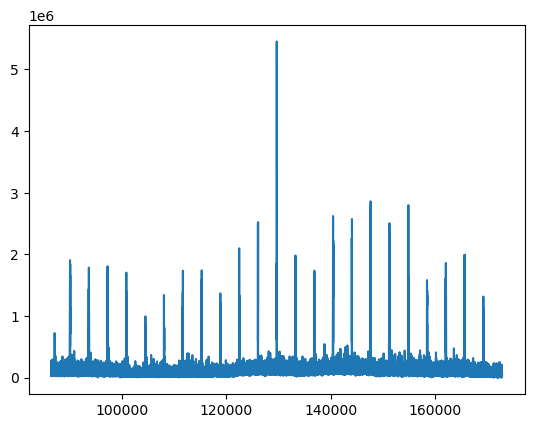

In [41]:
plt.plot(df_grouped["prompt_size"])